# **PLQY_all**

_by Felix Eickemeyer_

Evaluation of selected data.

In [1]:
import os

import pandas as pd
import shutil
from thot import ThotProject

from FTE_analysis_libraries import General as gen
from FTE_analysis_libraries import PLQY as lqy
from FTE_analysis_libraries import Spectrum as spc

In [2]:
# Initializes Thot project
db = ThotProject(dev_root=r'PLQY_results')

In [6]:
samples = db.find_assets({'type': 'absolute PL spectrum'})
sample_strlen = int(max([len(samples[idx].name.split('_absolute')[0]) for idx in range(len(samples))]))
for idx, sample in enumerate(samples):
    A = sample.metadata["A"]
    PLQY = sample.metadata["PLQY"]
    s_name = samples[idx].name.split('_absolute')[0]
    print(f'{idx:2}: {s_name.ljust(sample_strlen+1)}: A = {A:.1e}, PLQY = {PLQY:.1e}')

 0: EtchedFTO-PerFA0.97MA0.03-Masaud1 : A = 9.1e-01, PLQY = 2.2e-03
 1: EtchedFTO-Per_Masaud2             : A = 9.2e-01, PLQY = 1.9e-04
 2: Glass-Per-0%RH_Anand1             : A = 8.1e-01, PLQY = 2.1e-02
 3: Glass-Per-0%RH_Anand2             : A = 8.6e-01, PLQY = 1.7e-02
 4: Glass-Per-20%RH-4hours_Anand1     : A = 7.6e-01, PLQY = 1.5e-02
 5: Glass-Per-20%RH-4hours_Anand2     : A = 7.3e-01, PLQY = 6.6e-03
 6: Glass-Per-20%RH-Anand2            : A = 7.8e-01, PLQY = 1.5e-01
 7: Glass-Per-20%RH-spinout_Anand1    : A = 7.1e-01, PLQY = 4.9e-03
 8: Glass-Per-20%RH-spinout_Anand2    : A = 7.3e-01, PLQY = 8.3e-03
 9: glass-per-25%RH-highflow_Anand1   : A = 7.6e-01, PLQY = 9.2e-03
10: Glass-per-25%RH_Anand2            : A = 7.5e-01, PLQY = 8.3e-03
11: Glass-Per-50%RH-outside_Anand1    : A = 8.2e-01, PLQY = 1.4e-02
12: Glass-Per-50%RH-outside_Anand2    : A = 8.2e-01, PLQY = 1.9e-02
13: Glass-PerFA0.7Cs0.3_Anand1        : A = 7.4e-01, PLQY = 5.8e-04
14: Glass-PerFA0.7Cs0.3_Anand2        : A = 6.6e

# Select samples

In [25]:
samples = db.find_assets({'type': 'absolute PL spectrum'})

selection_type = 'higher bg perovskite'
#selection = [2, 3, 6, 18, 11, 12] # 'humidity variation'
#selection = [6, 18, 4, 5] # 'solution ageing (4 h)'
#selection = [6, 18, 9, 10] # 'dry air flow rate'
#selection = [6, 18, 7, 8] # 'spin-coating inside/outside, annealing inside'
selection = [6, 18, 15, 16] # 'higher bg perovskite'

samples = [samples[selection[idx]] for idx in range(len(selection))]
sa = []
for idx, sample in enumerate(samples):
    # sample.file = sample.file+'.csv' #only for Shuai samples, delete later
    sa.append(spc.PEL_spectrum.load(sample.file, take_quants_and_units_from_file=True))
    print(f'{idx:2}: {sample.name}')

 0: Glass-Per-20%RH-Anand2_absolute PL spectrum.csv
 1: Glass-Per_Anand1_absolute PL spectrum.csv
 2: Glass-PerFA0.8Cs0.2_Anand1_absolute PL spectrum.csv
 3: glass-perFA0.8Cs0.2_Anand2_absolute PL spectrum.csv


Glass-Per-20%RH-Anand2     : A = 7.8e-01, PLQY = 1.5e-01, PF = 2.6e+20 1/(s m2)
Glass-Per_Anand1           : A = 7.6e-01, PLQY = 3.0e-02, PF = 5.2e+19 1/(s m2)
Glass-PerFA0.8Cs0.2_Anand1 : A = 7.3e-01, PLQY = 6.1e-03, PF = 9.3e+18 1/(s m2)
glass-perFA0.8Cs0.2_Anand2 : A = 6.1e-01, PLQY = 1.1e-02, PF = 1.7e+19 1/(s m2)


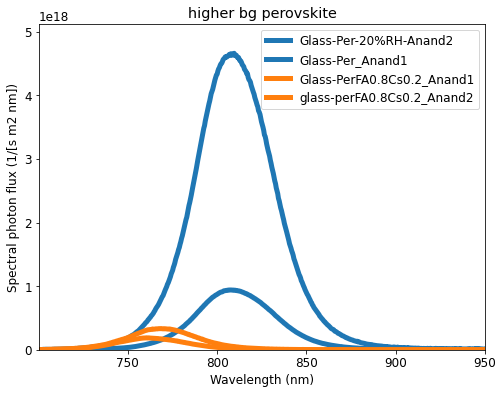

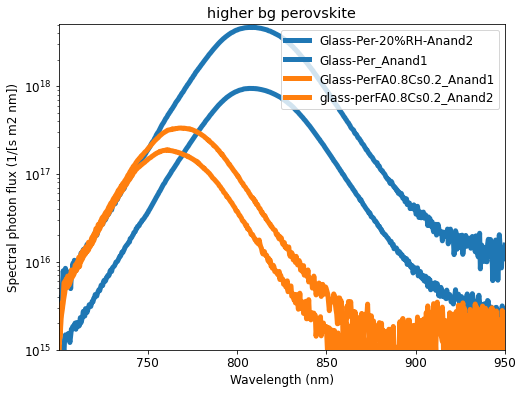

In [26]:
allPL = spc.PEL_spectra(sa)
allPL.names_to_label()

new_labels = []
strlen = int(max([len(samples[idx].name.split('_absolute')[0]) for idx in range(len(samples))]))

for idx in range(len(samples)):
    allPL.sa[idx].plotstyle = dict(color = gen.colors[idx], linewidth = 5, linestyle = '-')
    sm = samples[idx].metadata
    A = sm['A']
    PLQY = sm['PLQY']
    s_name = samples[idx].name.split('_absolute')[0]
    new_labels.append(s_name)
    PF = allPL.sa[idx].photonflux(start = 700, stop = 900)
    print(f'{s_name.ljust(strlen+1)}: A = {A:.1e}, PLQY = {PLQY:.1e}, PF = {PF:.1e} 1/(s m2)')

change_plotstyle = False
if change_plotstyle:
    allPL.sa[0].plotstyle = dict(color = gen.colors[0], linewidth = 5, linestyle = '-')
    allPL.sa[1].plotstyle = dict(color = gen.colors[0], linewidth = 5, linestyle = '-')
    allPL.sa[2].plotstyle = dict(color = gen.colors[1], linewidth = 5, linestyle = '-')
    allPL.sa[3].plotstyle = dict(color = gen.colors[1], linewidth = 5, linestyle = '-')
    allPL.sa[4].plotstyle = dict(color = gen.colors[2], linewidth = 5, linestyle = '-')
    allPL.sa[5].plotstyle = dict(color = gen.colors[3], linewidth = 5, linestyle = '-')
    #allPL.sa[6].plotstyle = dict(color = gen.colors[1], linewidth = 5, linestyle = '-')
    #allPL.sa[7].plotstyle = dict(color = gen.colors[1], linewidth = 5, linestyle = '-')
    #allPL.sa[8].plotstyle = dict(color = gen.colors[2], linewidth = 5, linestyle = '-')
    #allPL.sa[9].plotstyle = dict(color = gen.colors[2], linewidth = 5, linestyle = '-')
    #allPL.sa[10].plotstyle = dict(color = gen.colors[2], linewidth = 5, linestyle = '-')
    #allPL.sa[11].plotstyle = dict(color = gen.colors[2], linewidth = 5, linestyle = '-')
    #allPL.sa[12].plotstyle = dict(color = gen.colors[3], linewidth = 5, linestyle = '-')
    #allPL.sa[13].plotstyle = dict(color = gen.colors[3], linewidth = 5, linestyle = '-')
    #allPL.sa[14].plotstyle = dict(color = gen.colors[3], linewidth = 5, linestyle = '-')
    change_plotstyle = False
    
change_plotstyle = True
if change_plotstyle:
    for idx, sp in enumerate(allPL.sa):
        if idx < 2:
            sp.plotstyle = dict(color=gen.colors[0], linewidth=5, linestyle='-')
        elif idx < 4:
            sp.plotstyle = dict(color=gen.colors[1], linewidth=5, linestyle='-')
        elif idx < 6:
            sp.plotstyle = dict(color=gen.colors[2], linewidth=5, linestyle='-')
        else:
            sp.plotstyle = dict(color=gen.colors[3], linewidth=5, linestyle='-')
    change_plotstyle = False


# allPL.label(['s1', 's2', 's3', 's4', 's6'])
allPL.label(new_labels)
FN_lin = selection_type.replace(' ', '_') + '_linear.png'
all_graph = allPL.plot(bottom=0, plotstyle='individual', figsize=(8, 6),
                       return_fig=True, show_plot=False, title=selection_type)
lqy.add_graph(db, FN_lin, all_graph)

FN_log = selection_type.replace(' ', '_') + '_semilog.png'
all_graph_log = allPL.plot(yscale='log',
                           bottom=1e15,
                           divisor=1e3,
                           plotstyle='individual',
                           figsize=(8, 6),
                           return_fig=True,
                           show_plot=False,
                           title=selection_type)
lqy.add_graph(db, FN_log, all_graph_log)

# Save all data in exchange folder

In [27]:
exch_dir = os.path.join(db.root, 'exchange')

# graph linear
filepath = os.path.join(exch_dir, FN_lin)
all_graph.savefig(filepath)

# graph semilog
filepath = os.path.join(exch_dir, FN_log)
all_graph_log.savefig(filepath)
